# Level_1_(1,2,3,4)_TASKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/bhavesh/Downloads/Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print(df.shape)

(9551, 21)


In [5]:
print(df.columns.tolist())

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [6]:
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [7]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
duplicates = df.duplicated().sum()
print(duplicates)

0


# TASK 1 : Top Cuisines
## 1.1 Determine the Top Three Most Common Cuisines in the Dataset


In [9]:
top_3_cuisines = df['Cuisines'].value_counts().head(3)

In [10]:
print(top_3_cuisines)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


/var/folders/4s/m5z900sd603dzynl31hmy88m0000gn/T/ipykernel_13118/2830142586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_cuisines.values, y=top_3_cuisines.index, palette="viridis")


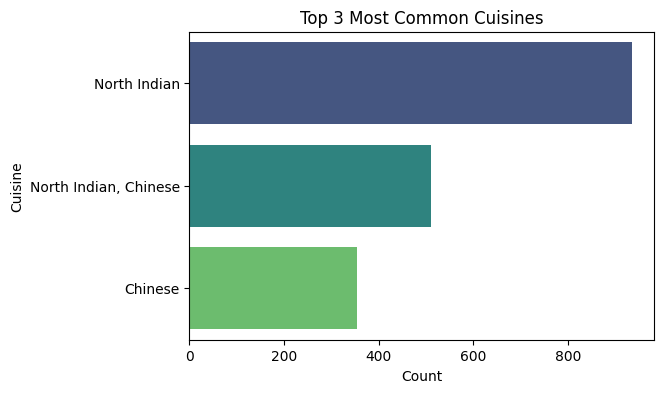

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x=top_3_cuisines.values, y=top_3_cuisines.index, palette="viridis")
plt.title("Top 3 Most Common Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

- The dataset shows that the **top three cuisines** are **North Indian**, **North Indian-Chinese**, and **Chinese** (936,511,354).

## 1.2 Calculate the percentage of restaurants that serve each of the top cuisines.

In [12]:
cuisines_counts = df['Cuisines'].value_counts()
print(cuisines_counts)

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64


In [13]:
total_restaurants = len(df)
cuisine_percent = (top_3_cuisines/ total_restaurants) * 100


In [14]:
print(cuisine_percent)

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


In [15]:
cuisine_summary = pd.DataFrame({
    'Count': top_3_cuisines,
    'Percentage (%)': cuisine_percent.round(2)
})
print(cuisine_summary)

                       Count  Percentage (%)
Cuisines                                    
North Indian             936            9.80
North Indian, Chinese    511            5.35
Chinese                  354            3.71


- **North Indian cuisine** dominates with **9.8%** share.  
- **North Indian + Chinese** fusion is also common (5.35%), showing customer interest in mixed menus.  
- **Chinese cuisine** alone makes up **3.71%**, reflecting steady demand.  
- North Indian dishes clearly lead the restaurant landscape.

# Task 2: City Analysis
## 2.1 Identify the city with the highest number of restaurants in the dataset.

In [16]:
top_city = df['City'].value_counts().head(1)
print(top_city)

City
New Delhi    5473
Name: count, dtype: int64


- The city with the **highest number of restaurants** in the dataset is **New Delhi** with **5473 restaurants**

## 2.2 Calculate the average rating for restaurants in each city.

In [17]:
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).round(2)
print(avg_rating_city)

City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
                    ... 
New Delhi           2.44
Montville           2.40
Mc Millan           2.40
Noida               2.04
Faridabad           1.87
Name: Aggregate rating, Length: 141, dtype: float64


## 2.3 Determine the city with the highest average rating.

In [18]:
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().round(2)


In [19]:
top_highest_rated_city = avg_rating_city.sort_values(ascending = False).head(1)

In [20]:
print(top_highest_rated_city)

City
Inner City    4.9
Name: Aggregate rating, dtype: float64


- The city with the **highest average restaurant rating** is **[Inner City]**, with an average rating of **[4.9]**.

# Task 3: Task: Price Range Distribution
## 3.1 Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

/var/folders/4s/m5z900sd603dzynl31hmy88m0000gn/T/ipykernel_13118/594097677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Price range',data = df, palette="viridis" )


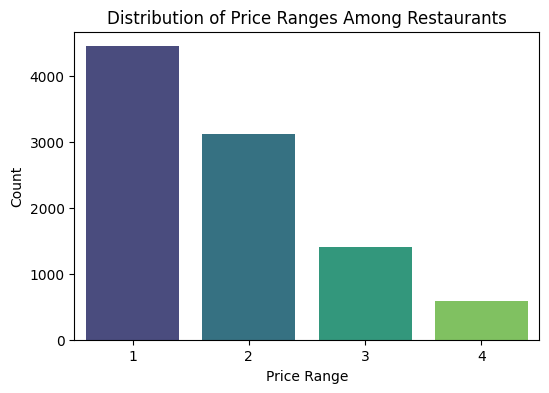

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'Price range',data = df, palette="viridis" )
plt.title("Distribution of Price Ranges Among Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

- The visualization shows how restaurant price ranges are distributed in the dataset.

## 3.2 Calculate the percentage of restaurants in each price range category.

In [22]:
price_counts = df['Price range'].value_counts()

price_percent = (price_counts/len(df))*100

price_summary = pd.DataFrame({
    'Count' : price_counts,
    'Percentage(%)' : price_percent.round(2)})

price_summary

,Count,Percentage(%)
Price range,,
1,4444,46.53
2,3113,32.59
3,1408,14.74
4,586,6.14


# Task 4 : Online Delivery
## 4.1 Determine the percentage of restaurants that offer online delivery.

In [23]:
online_delivery_count = df['Has Online delivery'].value_counts()

online_delivery_percent = (online_delivery_count/len(df))*100

online_delivery_summary = pd.DataFrame({
    'Count': online_delivery_count,
    'Percentage(%)' : online_delivery_percent.round(2)
})
online_delivery_summary

,Count,Percentage(%)
Has Online delivery,,
No,7100,74.34
Yes,2451,25.66


- **[25.66%]** of restaurants offer online delivery, while **[74.34%]** do not.

## 4.2 Compare the average ratings of restaurants with and without online delivery.

In [24]:
avg_rating_online = df.groupby('Has Online delivery')['Aggregate rating'].mean().round(2)
avg_rating_online

Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64

- Restaurants that **offer online delivery** have an average rating of **[3.75]**.
- Restaurants that **do not offer online delivery** have an average rating of **[2.47]**.